In [1]:
import mvts_utils as mv
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2

In [78]:
num_samples_list = np.arange(10, 101, 10)
noise_list = np.array([0,.1,.5,1,5,10,50,100])
times = np.arange(0,1000,.1)

acc = np.empty((len(num_samples_list),len(noise_list),1000)) 

for inoise,noise in enumerate(noise_list):

    x, y = mv.make_prepared_dataset(times, noise=noise)

    for isamp,num_samples in enumerate(num_samples_list):

        x_downsamp, y_downsamp = mv.downsample(x, y, num_samples) 

        clf_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=37))
        shuffle = StratifiedShuffleSplit(n_splits=100)

        scores = cross_val_score(clf_pipeline, x_downsamp, y_downsamp, cv=shuffle)
        acc[isamp, inoise] = scores

ValueError: The test_size = 1 should be greater or equal to the number of classes = 2

In [76]:
acc_mean = np.mean(acc,2)

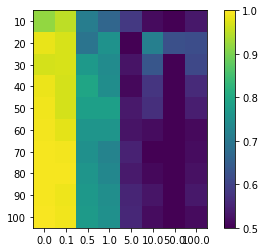

In [77]:
plt.imshow(acc_mean, vmin=.5, vmax=1)
plt.colorbar()
plt.xticks(np.arange(len(noise_list)), labels=noise_list);
plt.yticks(np.arange(len(num_samples_list)),labels=num_samples_list);